## Zadanie
Rozważmy model sieci S = <G,H>. Przez N=\[n(i,j)] będziemy oznaczać macierz natężeń strumienia pakietów, gdzie element n(i,j) jest liczbą pakietów przesyłanych (wprowadzanych do sieci) w ciągu sekundy od źródła v(i) do ujścia v(j).
* Zaproponuj topologię grafu G ale tak aby żaden wierzchołek nie był izolowany oraz aby: |V|=20, |E|<30. Zaproponuj N oraz następujące funkcje krawędzi ze zbioru H: funkcję przepustowości 'c' (rozumianą jako maksymalną liczbę bitów, którą można wprowadzić do kanału komunikacyjnego w ciągu sekundy), oraz funkcję przepływu 'a' (rozumianą jako faktyczną liczbę pakietów, które wprowadza się do kanału komunikacyjego w ciągu sekundy). Pamiętaj aby funkcja przeplywu realizowała macierz N oraz aby dla każdego kanału 'e' zachodziło: c(e) > a(e).
* Niech miarą niezawodności sieci jest prawdopodobieństwo tego, że w dowolnym przedziale czasowym, nierozspójniona sieć zachowuje T < T_max, gdzie: T = 1/G * SUM_e( a(e)/(c(e)/m - a(e)) ), jest średnim opóźnieniem pakietu w sieci, SUM_e oznacza sumowanie po wszystkich krawędziach 'e' ze zbioru E, 'G' jest sumą wszystkich elementów macierzy natężeń, a 'm' jest średnią wielkością pakietu w bitach. Napisz program szacujący niezawodność takiej sieci przyjmując, że prawdopodobieństwo nieuszkodzenia każdej krawędzi w dowolnym interwale jest równe 'p'. Uwaga: 'N', 'p', 'T_max' oraz topologia wyjsciowa sieci są parametrami.
* Przy ustalonej strukturze topologicznej sieci i dobranych przepustowościach stopniowo zwiększaj wartości w macierzy natężeń. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).
* Przy ustalonej macierzy natężeń i strukturze topologicznej stopniowo zwiększaj przepustowości. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).
* Przy ustalonej macierzy natężeń i pewnej początkowej strukturze topologicznej, stopniowo zmieniaj topologię poprzez dodawanie nowych krawędzi o przepustowościach będących wartościami średnimi dla sieci początkowej. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).

## Sprawozdanie
Do rozwiązania tych zadań wykorzystam biblioteki _NetworkX_, _NumPy_ oraz _Pyvis_.

In [2]:
import random
import networkx as nx
import numpy as np

### Punkt 1.<br />
proponowana topologia:

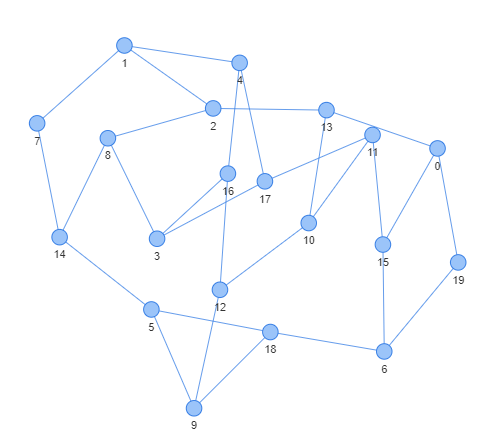

In [3]:
from IPython.display import Image
Image(filename='topology.png')

topologia jako macierz:

In [4]:
connections_matrix = np.matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
                                    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Jako _*N*_ przyjmuję losową macierz posiadającą wartości między 0 a 5<br />
Jako _*c*_ przyjmuję losową macierz posiadającą wartości między 100 a 300 * średnia wielkość pakietu <br />
Jako _*e*_ przyjmuję macierz będącą wynikiem funkcji:

In [5]:
def packets_on_connection(connections, intensity):
    packets_matrix = np.zeros_like(intensity)
    nx_connections = nx.from_numpy_matrix(connections)
    for i in range(len(intensity)):
        for j in range(len(intensity)):
            if i == j:
                continue
            track = nx.dijkstra_path(nx_connections, i, j)
            for k in range(len(track) - 1):
                packets_matrix[track[k]][track[(k + 1)]] += intensity[i][j]
    return packets_matrix

Obliczanie parametrów:

In [6]:
avg_packet_size = 1500*8
intensity_matrix = np.random.randint(10, 50, [20, 20])
speed_matrix = np.random.randint(10000000, 100000000, [20, 20])
packets_matrix = packets_on_connection(connections_matrix, intensity_matrix)
graph = nx.from_numpy_matrix(packets_matrix)
print(packets_matrix)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0 1001
     0  537    0    0    0  310]
 [   0    0  474    0  563    0    0  456    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0  689    0    0    0    0    0    0  585    0    0    0    0  951
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  633    0    0    0    0    0
     0    0  380  337    0    0]
 [   0  373    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  307  279    0    0]
 [   0    0    0    0    0    0    0    0    0  427    0    0    0    0
   818    0    0    0  542    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  617    0    0  550  239]
 [   0  522    0    0    0    0    0    0    0    0    0    0    0    0
   362    0    0    0    0    0]
 [   0    0  668  565    0    0    0    0    0    0    0    0    0    0
   598    0    0    0    0    0]
 [   0    0    0    0    0  434    0    0    0    0    

### Punkt 2.<br />
funkcja obliczająca T:

In [7]:
def isSaturated(avg_packet_size, speed_matrix, packets_matrix):
    for i in range(len(speed_matrix)):
        for j in range(len(speed_matrix)):
            if i == j:
                continue
            if packets_matrix[i][j] > speed_matrix[i][j]/avg_packet_size:
                return True
    return False

In [8]:
def T(speed_matrix, packets_matrix, intensity_matrix, graph, avg_packet_size):
    sum_t = 0
    for i, j in graph.edges():
        sum_t += packets_matrix[i][j] / ((speed_matrix[i][j] / avg_packet_size) - packets_matrix[i][j])
        sum_t += packets_matrix[j][i] / ((speed_matrix[j][i] / avg_packet_size) - packets_matrix[j][i])
    return sum_t / intensity_matrix.sum()

funkcja testująca sieć:

In [9]:
def networkTest(intensity, probability_of_non_failure, t_max, connections, speed, avg_packet_size):
    failed_connections = np.copy(connections)
    for i in range(len(connections)):
        for j in range(i+1, len(connections)):
            if failed_connections[i][j] == 0:
                continue
            if random.random() > probability_of_non_failure:
                failed_connections[i][j] = 0
                failed_connections[j][i] = 0
    if not nx.is_connected(nx.from_numpy_matrix(failed_connections)):
        return False
    packets_matrix = packets_on_connection(failed_connections, intensity)
    if isSaturated(avg_packet_size, speed, packets_matrix):
        return False
    if t_max < T(speed, packets_matrix, intensity, nx.from_numpy_matrix(connections),  avg_packet_size):
        return False
    return True

Test dla 1000 przypadków:

In [10]:
successes = 0
for _ in range(1000):
    if networkTest(intensity_matrix, 0.99, 0.03, connections_matrix, speed_matrix, avg_packet_size):
        successes += 1
print(f'{successes/10}%')

98.6%


### Punkt 3.<br />

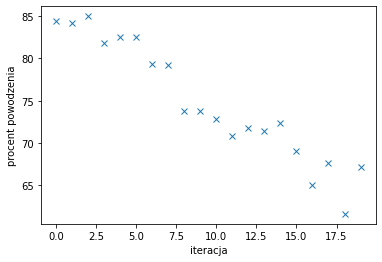

<Figure size 432x288 with 0 Axes>

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

new_intensity_matrix = np.copy(intensity_matrix)
results = []

for i in range(20):
    for _ in range(50):
        hi = random.randint(0, len(new_intensity_matrix) - 1), random.randint(0, len(new_intensity_matrix) - 1)
        new_intensity_matrix[hi[0]][hi[1]] += 1
        new_intensity_matrix[hi[1]][hi[0]] += 1
    successes = 0
    for _ in range(500):
        if networkTest(new_intensity_matrix, 0.95, 0.01, connections_matrix, speed_matrix, avg_packet_size):
            successes += 1
    results.append(successes/5)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('procent powodzenia')
plt.show()
plt.clf()

### Punkt 4.<br />

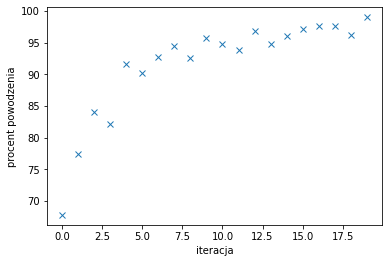

<Figure size 432x288 with 0 Axes>

In [17]:
new_speed_matrix = np.copy(speed_matrix)
results = []

for i in range(20):
    for _ in range(100):
        h1 = random.randint(0, len(new_speed_matrix) - 1)
        h2 = random.randint(0, len(new_speed_matrix) - 1)
        while connections_matrix[h1, h2] == 0 or h1 == h2:
            h1, h2 = random.randint(0, len(new_speed_matrix) - 1), random.randint(0, len(new_speed_matrix) - 1)
        new_speed_matrix[h1][h2] += 100000
        new_speed_matrix[h1][h2] += 100000
    successes = 0
    for _ in range(500):
        if networkTest(new_intensity_matrix, 0.95, 0.01, connections_matrix, new_speed_matrix, avg_packet_size):
            successes += 1
    results.append(successes/5)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('procent powodzenia')
plt.show()
plt.clf()

### Punkt 5.<br />

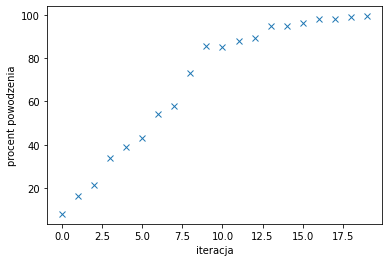

<Figure size 432x288 with 0 Axes>

In [41]:
new_connections_matrix = np.copy(connections_matrix)
results = []
new_intensity_matrix = np.random.randint(20, 50, [20, 20])
possibilities = np.where(new_connections_matrix == 0)
np.delete(possibilities, [(i,i) for i in range(len(possibilities[0]))], axis=1)
for i in range(20):
    for _ in range(3):
        hi = random.randint(0, len(possibilities[0]) - 1)
        hi = possibilities[0][hi], possibilities[1][hi]
        new_connections_matrix[hi[0]][hi[1]] = 1
        new_connections_matrix[hi[1]][hi[0]] = 1
        np.delete(possibilities, hi, axis=1)
        np.delete(possibilities, (hi[1], hi[0]), axis=1)
    successes = 0
    for _ in range(500):
        if networkTest(new_intensity_matrix, 0.70, 0.05, new_connections_matrix, speed_matrix, avg_packet_size):
            successes += 1
    results.append(successes/5)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('procent powodzenia')
plt.show()
plt.clf()